In [1]:
import pandas as pd
import os, glob
import numpy as np
from scipy.stats import t
#from google.colab import drive
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import re
pd.options.display.float_format = '{:e}'.format
#!pip install rampy
import rampy
from sklearn.metrics import r2_score
from scipy.stats import linregress

from matplotlib import font_manager
from matplotlib import rcParams

#from google.colab import drive
#drive.mount('/content/drive')
PALETTE = ['#1b6872', '#df208a', '#efb475', '#aec5fb', '#D5A6E6', '#A4D4B4', '#FFD166', '#FF6F61']

In [2]:
path = "Medidas SVW"

In [3]:
# Define relative path to folder containing the text files
files_folder = str(path)

# Create a dataframe list by using a list comprehension
files = [pd.read_csv(file, delimiter=',', skiprows=5, encoding = 'utf16') for file in glob.glob(os.path.join(files_folder ,"*.csv"))]

# Get filenames
electrode = [os.path.basename(filename)[:].rstrip('csv') for filename in glob.glob(os.path.join(files_folder ,"*.csv"))]

print(electrode)

# Concatenate the list of DataFrames into one
files_df = pd.concat(files, axis=1)
files_df = files_df[['V','µA']]
files_df = files_df.T.drop_duplicates().T

sensor = electrode
d ={'µA':sensor}
files_df = files_df.rename(columns=lambda c: d[c].pop(0) if c in d.keys() else c)

files_df.head()

['6-D7-SWV-5mM-FF.', '9-PBS-SWV-5mM-FF.', '22-limpo-SWV-5mM-FF-2.', '9-D6-SWV-5mM-FF-2.', '16-limpo-SWV-5mM-FF.', '3-cisteina-SWV-5mM-FF-1.', '4-cisteina-SWV-5mM-FF-1.', '5-D7-SWV-5mM-FF-1.', '13-pep-SWV-5mM-FF.', '23-limpo-SWV-5mM-FF.', '5-D8-SWV-5mM-FF.', '3-PBS-SWV-5mM-FF.', '10-branco-SWV-5mM-FF.', '15-C7-CBM-SWV-5mM-FF-2.', '3-D7-SWV-5mM-FF-2.', '7-D6-SWV-5mM-FF-1.', '6-cisteamina-SWV-5mM-FF.', '10-limpo-SWV-5mM-FF-1.', '4-branco-SWV-5mM-FF.', '13-D7-CBM-SWV-5mM-FF.', '14-D8-CBM-SWV-5mM-FF.', '9-GO-SWV-5mM-FF.', '11-branco-SWV-5mM-FF-2.', '1-branco-SWV-5mM-FF.', '1-PBS-SWV-5mM-FF.', '9-D7-SWV-5mM-FF.', '1-D6-SWV-5mM-FF.', '9-branco-SWV-5mM-FF.', '19-limpo-SWV-5mM-FF.', '10-GO-SWV-5mM-FF-2.', '19-limpo-SWV-5mM-FF-1.', '3-limpo-SWV-5mM-FF-1.', '8-CBM-SWV-5mM-FF-1.', '1-limpo-SWV-5mM-FF-1.', '14-D8-CBM-SWV-5mM-FF-2.', '13-D7-CBM-SWV-5mM-FF-2.', '4-branco-SWV-5mM-FF-1.', '5-D6-SWV-5mM-FF-2.', '2-D7-SWV-5mM-FF.', '5-cisteamina-SWV-5mM-FF-1.', '5-branco-SWV-5mM-FF-1.', '11-PBS-SWV-5mM-F

,V,6-D7-SWV-5mM-FF.,9-PBS-SWV-5mM-FF.,22-limpo-SWV-5mM-FF-2.,9-D6-SWV-5mM-FF-2.,16-limpo-SWV-5mM-FF.,3-cisteina-SWV-5mM-FF-1.,4-cisteina-SWV-5mM-FF-1.,5-D7-SWV-5mM-FF-1.,13-pep-SWV-5mM-FF.,...,17-limpo-SWV-5mM-FF-1.,18-limpo-SWV-5mM-FF-2.,6-PBS-SWV-5mM-FF-2.,8-PBS-SWV-5mM-FF-2.,3-CBM-SWV-5mM-FF-2.,10-GO-SWV-5mM-FF.,5-limpo-SWV-5mM-FF-2.,1-D6-SWV-5mM-FF-1.,6-branco-SWV-5mM-FF-2.,3-CBM-SWV-5mM-FF-1.
0,-0.0964460372924805,7.488775e+00,1.384025e+01,1.404529e+01,2.081642e+01,8.661795e+00,1.170878e+01,1.183753e+01,1.197104e+01,1.688247e+01,...,1.271491e+01,1.272445e+01,1.151805e+01,1.161342e+01,1.263862e+01,7.865477e+00,1.272445e+01,1.405482e+01,1.139407e+01,1.251464e+01
1,-0.0929298400878906,4.518032e+00,9.954023e+00,8.847761e+00,1.482730e+01,5.486012e+00,7.102537e+00,7.188368e+00,7.245588e+00,1.296287e+01,...,7.870245e+00,7.836866e+00,6.892729e+00,6.949949e+00,7.827330e+00,4.847050e+00,7.860708e+00,9.114790e+00,6.797361e+00,7.746267e+00
2,-0.0894927978515625,3.173351e+00,8.060980e+00,6.501722e+00,1.189475e+01,4.041195e+00,4.985332e+00,5.052090e+00,5.085468e+00,1.090293e+01,...,5.652905e+00,5.605221e+00,4.770756e+00,4.818439e+00,5.605221e+00,3.468990e+00,5.643368e+00,6.802130e+00,4.699230e+00,5.543232e+00
3,-0.0859766006469727,2.429485e+00,6.954718e+00,5.199909e+00,1.016860e+01,3.235340e+00,3.812313e+00,3.864765e+00,3.879070e+00,9.644079e+00,...,4.417896e+00,4.365444e+00,3.588200e+00,3.631115e+00,4.360676e+00,2.701283e+00,4.422665e+00,5.500317e+00,3.526211e+00,4.308224e+00
4,-0.0824613571166992,1.966953e+00,6.239414e+00,4.427433e+00,9.043264e+00,2.744198e+00,3.082752e+00,3.125668e+00,3.135204e+00,8.776236e+00,...,3.659725e+00,3.602505e+00,2.863407e+00,2.892017e+00,3.583431e+00,2.219677e+00,3.678799e+00,4.670620e+00,2.810955e+00,3.540516e+00


<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_36730/1917254076.py:24: SyntaxWarning: invalid escape sequence '\d'
  condicao = re.findall('(\d+[A-Za-z]+|[A-Za-z]+\d+|\d+|[A-Za-z]+)', column)


([<matplotlib.axis.XTick at 0x7460162fdbe0>,
 [Text(-0.1, 0, '−0.1'),
  Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.3, 0, '0.3'),
  Text(0.4, 0, '0.4')])

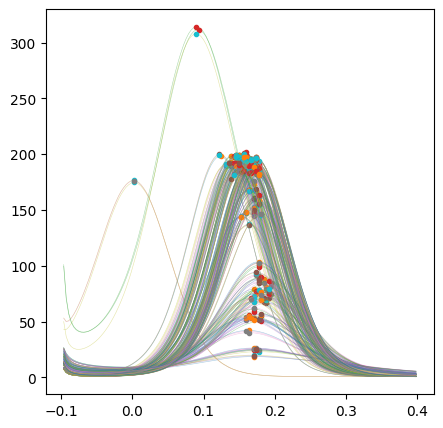

In [4]:
plt.rcParams["figure.figsize"] = (5,5)
files_df['V'] = pd.to_numeric(files_df['V'], downcast='float',  errors='coerce')

x = files_df['V'] # First column data
df = files_df.loc[(files_df['V']<=0.3) & (files_df['V']>=-0.1)].reset_index(drop=True) #select X range
col1 = df['V'] # First column data

peak_current = []
v_peak_current = []
eletrodo = []

a = 0

for column in df.columns[1:]:
        y = files_df[column]
        col2 = df[column] # Second column data

        #Find peaks
        peak_idx, _ = find_peaks(col2, prominence=0.000000001, height = 0.00 , distance = 100)  # Find peaks

        #Potential applied and array informations
        v_peak_current.append(df.at[peak_idx.max(),'V'])
        peak_current.append(col2[peak_idx.max()])
        condicao = re.findall('(\d+[A-Za-z]+|[A-Za-z]+\d+|\d+|[A-Za-z]+)', column)
        #print(condicao)

        eletrodo.append( condicao[0] + '-' + condicao[1])

        #Plot data
        plt.plot(x,y, lw=0.4, alpha=0.4 )

        #Plot peaks and valleys
        plt.plot(col1[peak_idx],col2[peak_idx], marker="o", ls="", ms=3)

        #Read data
        a+=1

plt.xticks([-0.1,0.0,0.1,0.2,0.3,0.4])
#print(a)
#print(eletrodo[0])

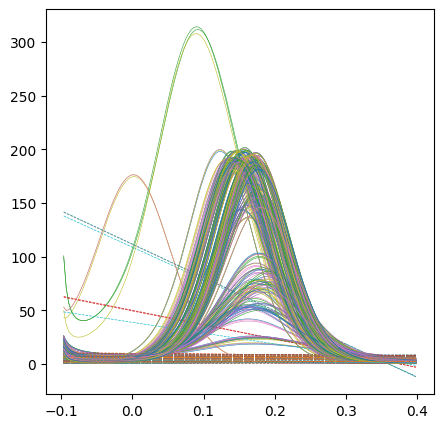

In [5]:
plt.rcParams["figure.figsize"] = (5,5)

baseline_data = {}

bl_1 = []

# need to define some fitting regions for the spline
roi = np.array([[-0.07,-0.01],[0.33,0.37]])

x = files_df['V'].to_numpy(dtype=float)
x = x[~np.isnan(x)]

baseline_data['V'] = x

for column in files_df.columns[1:]:
    y = files_df[column].to_numpy(dtype=float)
    y = y[~np.isnan(y)]
    # calculating the baselines
    ycalc_poly, base_poly = rampy.baseline(x, y, roi, 'poly', polynomial_order=1)
    bl_1.extend(base_poly[peak_idx[0]])
    #data - baseline
    subtracted = list()
    for item1, item2 in zip(y, base_poly):
        item = item1 - item2
        subtracted.extend(item)
    baseline_data[column] = subtracted
    #plot
    plt.plot(x, y, lw = 0.4)
    plt.plot(x, base_poly,linestyle= 'dashed', lw = 0.5)

In [6]:
results = pd.DataFrame()

results['eletrodo'] = eletrodo
results['peak_current'] = peak_current
results['v_peak_current'] = v_peak_current
results['baseline_current'] = bl_1

results_baseline = pd.DataFrame()

results_baseline['eletrodo'] = eletrodo
results_baseline['peak_current'] = results.apply(lambda row : row['peak_current'] - row['baseline_current'], axis=1)
results_baseline['v_peak_current'] = v_peak_current

results_baseline.head()

,eletrodo,peak_current,v_peak_current
0,6-D7,1.867990e+02,1.632433e-01
1,9-PBS,7.063549e+01,1.912899e-01
2,22-limpo,1.973628e+02,1.211329e-01
3,9-D6,8.611258e+01,1.773052e-01
4,16-limpo,1.806429e+02,1.526957e-01


In [7]:
#results_baseline.to_excel('08 29 24 limpos L7 lote 1.xlsx')

In [8]:
# results_mean_1 será para os dados de antes de a gente ir embora para consulta
# e results_mean_2 para os que a Juliana fez sozinha depois

results_mean_1 = results_baseline.groupby(['eletrodo'], as_index=False)[['peak_current','v_peak_current']].agg({'peak_current':['mean','std'],'v_peak_current':['mean','std']})

results_mean_1

eletrodo peak_current              v_peak_current             
                      mean          std           mean          std
0       1-CBM 1.726545e+02 1.685541e+00   1.702738e-01 0.000000e+00
1        1-D6 1.431474e+02 9.884289e-01   1.807432e-01 0.000000e+00
2        1-D7 2.866303e+02 1.128499e+00   9.071668e-02 1.984377e-03
3       1-PBS 1.491834e+02 1.477667e+00   1.702738e-01 0.000000e+00
4    1-branco 1.438999e+02 1.952378e+00   1.702738e-01 0.000000e+00
..        ...          ...          ...            ...          ...
102      9-D7 6.463251e+01 2.111177e+00   1.702738e-01 0.000000e+00
103      9-GO 1.814843e+02 1.403598e+00   1.773052e-01 0.000000e+00
104     9-PBS 7.324997e+01 2.503623e+00   1.889464e-01 2.029527e-03
105  9-branco 4.935662e+01 6.418386e-01   1.807432e-01 0.000000e+00
106   9-limpo 1.895170e+02 1.872425e+00   1.386337e-01 0.000000e+00

[107 rows x 5 columns]

In [9]:
#results_mean.to_excel('09 12 24 agente de bloqueio OG dengue.xlsx')

In [10]:
df = pd.DataFrame(data=baseline_data)
df.to_excel('dados_LMF_19_09.xlsx')
df.head()

,V,6-D7-SWV-5mM-FF.,9-PBS-SWV-5mM-FF.,22-limpo-SWV-5mM-FF-2.,9-D6-SWV-5mM-FF-2.,16-limpo-SWV-5mM-FF.,3-cisteina-SWV-5mM-FF-1.,4-cisteina-SWV-5mM-FF-1.,5-D7-SWV-5mM-FF-1.,13-pep-SWV-5mM-FF.,...,17-limpo-SWV-5mM-FF-1.,18-limpo-SWV-5mM-FF-2.,6-PBS-SWV-5mM-FF-2.,8-PBS-SWV-5mM-FF-2.,3-CBM-SWV-5mM-FF-2.,10-GO-SWV-5mM-FF.,5-limpo-SWV-5mM-FF-2.,1-D6-SWV-5mM-FF-1.,6-branco-SWV-5mM-FF-2.,3-CBM-SWV-5mM-FF-1.
0,-9.644604e-02,6.269842e+00,9.511136e+00,8.885949e+00,1.440890e+01,6.312235e+00,1.022751e+01,1.039885e+01,1.020510e+01,1.009191e+01,...,1.004059e+01,1.017084e+01,1.028943e+01,1.041230e+01,1.089391e+01,6.675003e+00,9.452410e+00,1.129858e+01,1.011850e+01,1.080943e+01
1,-9.292984e-02,3.297724e+00,5.608417e+00,3.722496e+00,8.437986e+00,3.144883e+00,5.620590e+00,5.747100e+00,5.482911e+00,6.183390e+00,...,5.207892e+00,5.294444e+00,5.660889e+00,5.743833e+00,6.077935e+00,3.648953e+00,4.606937e+00,6.356313e+00,5.520796e+00,6.036251e+00
2,-8.949280e-02,1.951700e+00,3.699248e+00,1.409763e+00,5.523237e+00,1.708308e+00,3.502726e+00,3.608292e+00,3.325983e+00,4.134287e+00,...,3.002254e+00,3.073727e+00,3.535770e+00,3.607431e+00,3.851246e+00,2.263441e+00,2.407451e+00,4.041469e+00,3.421691e+00,3.828521e+00
3,-8.597660e-02,1.206460e+00,2.576489e+00,1.420231e-01,3.815295e+00,9.108835e-01,2.329032e+00,2.418379e+00,2.122852e+00,2.886521e+00,...,1.779218e+00,1.845130e+00,2.349995e+00,2.415101e+00,2.602015e+00,1.488110e+00,1.205014e+00,2.737423e+00,2.247675e+00,2.588710e+00
4,-8.246136e-02,7.425542e-01,1.844694e+00,-5.963896e-01,2.708163e+00,4.281698e-01,1.598797e+00,1.676693e+00,1.382251e+00,2.029758e+00,...,1.033016e+00,1.093368e+00,1.621984e+00,1.671000e+00,1.820086e+00,9.988825e-01,4.794083e-01,1.905494e+00,1.531423e+00,1.816200e+00


# Dados que a Juliana mediu:

In [11]:
path = "Medidas Juliana"

In [12]:
# Define relative path to folder containing the text files
files_folder = str(path)

# Create a dataframe list by using a list comprehension
files = [pd.read_csv(file, delimiter=',', skiprows=5, encoding = 'utf16') for file in glob.glob(os.path.join(files_folder ,"*.csv"))]

#for file in files:
    #print(file)
    #print(list(file['V']))
    
# Get filenames
electrode = [os.path.basename(filename)[:].rstrip('csv') for filename in glob.glob(os.path.join(files_folder ,"*.csv"))]

print(electrode)

# Concatenate the list of DataFrames into one
files_df = pd.concat(files, axis=1)
files_df = files_df[['V','µA']]
files_df = files_df.T.drop_duplicates().T

sensor = electrode
d ={'µA':sensor}
files_df = files_df.rename(columns=lambda c: d[c].pop(0) if c in d.keys() else c)

files_df.head()



['3_50_ff 5mM_SWV.', '6_100_ff 5mM_SWV-1.', '2_50_ff 5mM_SWV.', '4_50_ff 5mM_SWV-2.', '2_50_ff 5mM_SWV-2.', '8_100_ff 5mM_SWV-1.', '8_100_ff 5mM_SWV-2.', '12_50_ff 5mM_SWV-1.', '11_50_ff 5mM_SWV-1.', '6_100_ff 5mM_SWV.', '7_100_ff 5mM_SWV.', '7_100_ff 5mM_SWV-2.', '5_100_ff 5mM_SWV-1.', '11_50_ff 5mM_SWV-2.', '3_50_ff 5mM_SWV-2.', '4_50_ff 5mM_SWV.', '9_50_ff 5mM_SWV-2.', '6_100_ff 5mM_SWV-2.', '8_100_ff 5mM_SWV.', '11_50_ff 5mM_SWV.', '12_50_ff 5mM_SWV-2.', '5_100_ff 5mM_SWV.', '9_50_ff 5mM_SWV.', '4_50_ff 5mM_SWV-1.', '7_100_ff 5mM_SWV-1.', '5_100_ff 5mM_SWV-2.', '2_50_ff 5mM_SWV-1.', '9_50_ff 5mM_SWV-1.', '12_50_ff 5mM_SWV.', '3_50_ff 5mM_SWV-1.']


,V,3_50_ff 5mM_SWV.,6_100_ff 5mM_SWV-1.,2_50_ff 5mM_SWV.,4_50_ff 5mM_SWV-2.,2_50_ff 5mM_SWV-2.,8_100_ff 5mM_SWV-1.,8_100_ff 5mM_SWV-2.,12_50_ff 5mM_SWV-1.,11_50_ff 5mM_SWV-1.,...,12_50_ff 5mM_SWV-2.,5_100_ff 5mM_SWV.,9_50_ff 5mM_SWV.,4_50_ff 5mM_SWV-1.,7_100_ff 5mM_SWV-1.,5_100_ff 5mM_SWV-2.,2_50_ff 5mM_SWV-1.,9_50_ff 5mM_SWV-1.,12_50_ff 5mM_SWV.,3_50_ff 5mM_SWV-1.
0,-0.296525001525879,3.130436e-01,2.005100e-01,3.626347e-01,3.235340e-01,3.664494e-01,2.095699e-01,2.148151e-01,1.053100e+00,1.052623e+00,...,9.939718e-01,2.110004e-01,6.668615e-01,3.292561e-01,2.009869e-01,2.286434e-01,3.840923e-01,8.637953e-01,9.729910e-01,3.545284e-01
1,-0.293008804321289,3.030300e-01,1.952648e-01,3.497601e-01,3.163815e-01,3.564358e-01,2.033710e-01,2.090931e-01,1.036410e+00,1.028304e+00,...,9.777594e-01,2.043247e-01,6.568480e-01,3.211498e-01,1.957417e-01,2.238750e-01,3.726482e-01,8.456755e-01,9.501028e-01,3.445148e-01
2,-0.289493560791016,2.977848e-01,1.914501e-01,3.416538e-01,3.101826e-01,3.478527e-01,1.995564e-01,2.062321e-01,1.026874e+00,1.013522e+00,...,9.701300e-01,1.990795e-01,6.516027e-01,3.159046e-01,1.928806e-01,2.200603e-01,3.640652e-01,8.332777e-01,9.343672e-01,3.387928e-01
3,-0.285977363586426,2.930164e-01,1.885891e-01,3.335476e-01,3.068447e-01,3.407001e-01,1.981258e-01,2.052784e-01,1.019244e+00,1.000648e+00,...,9.644079e-01,1.943111e-01,6.482649e-01,3.130436e-01,1.904964e-01,2.167225e-01,3.569126e-01,8.261251e-01,9.229231e-01,3.325939e-01
4,-0.282462120056152,2.877712e-01,1.866817e-01,3.263950e-01,3.039837e-01,3.345013e-01,1.943111e-01,2.014637e-01,1.014476e+00,9.925413e-01,...,9.605932e-01,1.914501e-01,6.468344e-01,3.077984e-01,1.881123e-01,2.143383e-01,3.492832e-01,8.199263e-01,9.124327e-01,3.292561e-01


['3', '50', 'ff', '5mM', 'SWV']
['6', '100', 'ff', '5mM', 'SWV', '1']
['2', '50', 'ff', '5mM', 'SWV']
['4', '50', 'ff', '5mM', 'SWV', '2']
['2', '50', 'ff', '5mM', 'SWV', '2']
['8', '100', 'ff', '5mM', 'SWV', '1']
['8', '100', 'ff', '5mM', 'SWV', '2']
['12', '50', 'ff', '5mM', 'SWV', '1']
['11', '50', 'ff', '5mM', 'SWV', '1']
['6', '100', 'ff', '5mM', 'SWV']
['7', '100', 'ff', '5mM', 'SWV']
['7', '100', 'ff', '5mM', 'SWV', '2']
['5', '100', 'ff', '5mM', 'SWV', '1']
['11', '50', 'ff', '5mM', 'SWV', '2']
['3', '50', 'ff', '5mM', 'SWV', '2']
['4', '50', 'ff', '5mM', 'SWV']
['9', '50', 'ff', '5mM', 'SWV', '2']
['6', '100', 'ff', '5mM', 'SWV', '2']
['8', '100', 'ff', '5mM', 'SWV']
['11', '50', 'ff', '5mM', 'SWV']
['12', '50', 'ff', '5mM', 'SWV', '2']
['5', '100', 'ff', '5mM', 'SWV']
['9', '50', 'ff', '5mM', 'SWV']
['4', '50', 'ff', '5mM', 'SWV', '1']
['7', '100', 'ff', '5mM', 'SWV', '1']
['5', '100', 'ff', '5mM', 'SWV', '2']
['2', '50', 'ff', '5mM', 'SWV', '1']
['9', '50', 'ff', '5mM', 'SWV

<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_36730/556545795.py:24: SyntaxWarning: invalid escape sequence '\d'
  condicao = re.findall('(\d+[A-Za-z]+|[A-Za-z]+\d+|\d+|[A-Za-z]+)', column)


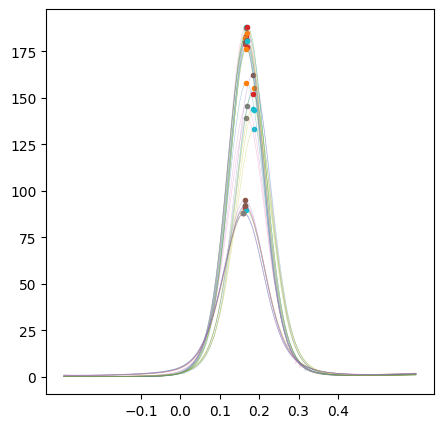

In [13]:
plt.rcParams["figure.figsize"] = (5,5)
files_df['V'] = pd.to_numeric(files_df['V'], downcast='float',  errors='coerce')

x = files_df['V'] # First column data
df = files_df.loc[(files_df['V']<=0.3) & (files_df['V']>=-0.1)].reset_index(drop=True) #select X range
col1 = df['V'] # First column data

peak_current = []
v_peak_current = []
eletrodo = []

a = 0

for column in df.columns[1:]:
        y = files_df[column]
        col2 = df[column] # Second column data

        #Find peaks
        peak_idx, _ = find_peaks(col2, prominence=0.000000001, height = 0.00 , distance = 100)  # Find peaks

        #Potential applied and array informations
        v_peak_current.append(df.at[peak_idx.max(),'V'])
        peak_current.append(col2[peak_idx.max()])
        condicao = re.findall('(\d+[A-Za-z]+|[A-Za-z]+\d+|\d+|[A-Za-z]+)', column)
        print(condicao)
        if condicao[1] == '50':
            c = 'D8'
        elif condicao[1] == '100':
            c = 'D9'
        eletrodo.append(condicao[0] + '-' + c)

        #Plot data
        plt.plot(x,y, lw=0.4, alpha=0.4 )

        #Plot peaks and valleys
        plt.plot(col1[peak_idx],col2[peak_idx], marker="o", ls="", ms=3)

        #Read data
        a+=1

plt.xticks([-0.1,0.0,0.1,0.2,0.3,0.4])
print(a)
print(eletrodo)

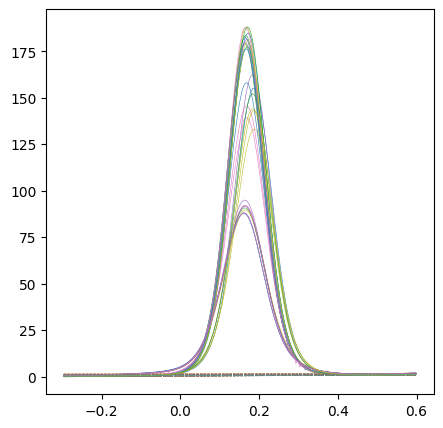

In [14]:
plt.rcParams["figure.figsize"] = (5,5)

baseline_data = {}

bl_1 = []

# need to define some fitting regions for the spline
roi = np.array([[-0.2,-0.1],[0.41,0.53]])

x = files_df['V'].to_numpy(dtype=float)
x = x[~np.isnan(x)]

baseline_data['V'] = x

for column in files_df.columns[1:]:
    y = files_df[column].to_numpy(dtype=float)
    y = y[~np.isnan(y)]
    # calculating the baselines
    ycalc_poly, base_poly = rampy.baseline(x, y, roi, 'poly', polynomial_order=1)
    bl_1.extend(base_poly[peak_idx[0]])
    #data - baseline
    subtracted = list()
    for item1, item2 in zip(y, base_poly):
        item = item1 - item2
        subtracted.extend(item)
    baseline_data[column] = subtracted
    #plot
    plt.plot(x, y, lw = 0.4)
    plt.plot(x, base_poly,linestyle= 'dashed', lw = 0.5)

In [15]:
results = pd.DataFrame()

results['eletrodo'] = eletrodo
results['peak_current'] = peak_current
results['v_peak_current'] = v_peak_current
results['baseline_current'] = bl_1

results_baseline = pd.DataFrame()

results_baseline['eletrodo'] = eletrodo
results_baseline['peak_current'] = results.apply(lambda row : row['peak_current'] - row['baseline_current'], axis=1)
results_baseline['v_peak_current'] = v_peak_current

results_baseline.head()
print(list(results_baseline['eletrodo']))
print(eletrodo)

['3-D8', '6-D9', '2-D8', '4-D8', '2-D8', '8-D9', '8-D9', '12-D8', '11-D8', '6-D9', '7-D9', '7-D9', '5-D9', '11-D8', '3-D8', '4-D8', '9-D8', '6-D9', '8-D9', '11-D8', '12-D8', '5-D9', '9-D8', '4-D8', '7-D9', '5-D9', '2-D8', '9-D8', '12-D8', '3-D8']
['3-D8', '6-D9', '2-D8', '4-D8', '2-D8', '8-D9', '8-D9', '12-D8', '11-D8', '6-D9', '7-D9', '7-D9', '5-D9', '11-D8', '3-D8', '4-D8', '9-D8', '6-D9', '8-D9', '11-D8', '12-D8', '5-D9', '9-D8', '4-D8', '7-D9', '5-D9', '2-D8', '9-D8', '12-D8', '3-D8']


In [16]:
#results_baseline.to_excel('08 29 24 limpos L7 lote 1.xlsx')

In [17]:
# results_mean_1 será para os dados de antes de a gente ir embora para consulta
# e results_mean_2 para os que a Juliana fez sozinha depois

results_mean_2 = results_baseline.groupby(['eletrodo'], as_index=False)[['peak_current','v_peak_current']].agg({'peak_current':['mean','std'],'v_peak_current':['mean','std']})

results_mean_2

eletrodo peak_current              v_peak_current             
                   mean          std           mean          std
0    11-D8 8.992670e+01 1.274080e+00   1.644150e-01 2.029527e-03
1    12-D8 8.664537e+01 2.226467e-01   1.597271e-01 0.000000e+00
2     2-D8 1.524733e+02 9.223787e+00   1.842585e-01 0.000000e+00
3     3-D8 1.434042e+02 1.103328e+01   1.877747e-01 0.000000e+00
4     4-D8 1.471163e+02 9.613866e+00   1.679303e-01 2.029527e-03
5     5-D9 1.815587e+02 5.959817e+00   1.691020e-01 2.029527e-03
6     6-D9 1.833751e+02 4.134398e+00   1.655868e-01 2.029527e-03
7     7-D9 1.805712e+02 3.678104e+00   1.702738e-01 0.000000e+00
8     8-D9 1.826344e+02 4.436693e+00   1.644150e-01 2.029527e-03
9     9-D8 9.131607e+01 2.273528e+00   1.632433e-01 0.000000e+00

In [18]:
#results_mean.to_excel('09 12 24 agente de bloqueio OG dengue.xlsx')

# Dados que a Juliana mediu com range de potencial de ate 0.3

In [19]:
path = "Medidas ate 0.3"

In [20]:
# Define relative path to folder containing the text files
files_folder = str(path)

# Create a dataframe list by using a list comprehension
files = [pd.read_csv(file, delimiter=',', skiprows=5, encoding = 'utf16') for file in glob.glob(os.path.join(files_folder ,"*.csv"))]

#for file in files:
    #print(file)
    #print(list(file['V']))
    
# Get filenames
electrode = [os.path.basename(filename)[:].rstrip('csv') for filename in glob.glob(os.path.join(files_folder ,"*.csv"))]

print(electrode)

# Concatenate the list of DataFrames into one
files_df = pd.concat(files, axis=1)
files_df = files_df[['V','µA']]
files_df = files_df.T.drop_duplicates().T

sensor = electrode
d ={'µA':sensor}
files_df = files_df.rename(columns=lambda c: d[c].pop(0) if c in d.keys() else c)

files_df.head()



['10_50_ff 5mM_SWV-4.', '10_50_ff 5mM_SWV-3.', '10_50_ff 5mM_SWV-2.']


,V,10_50_ff 5mM_SWV-4.,10_50_ff 5mM_SWV-3.,10_50_ff 5mM_SWV-2.
0,-0.296525001525879,1.559024e+00,2.768040e-01,3.554821e-01
1,-0.293008804321289,1.539950e+00,2.710819e-01,3.688335e-01
2,-0.289493560791016,1.524215e+00,3.130436e-01,3.707409e-01
3,-0.285977363586426,1.505618e+00,3.654957e-01,4.103184e-01
4,-0.282462120056152,1.499419e+00,3.440380e-01,4.298687e-01


['10', '50', 'ff', '5mM', 'SWV', '4']
['10', '50', 'ff', '5mM', 'SWV', '3']
['10', '50', 'ff', '5mM', 'SWV', '2']
3
['10-D8', '10-D8', '10-D8']


<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_36730/556545795.py:24: SyntaxWarning: invalid escape sequence '\d'
  condicao = re.findall('(\d+[A-Za-z]+|[A-Za-z]+\d+|\d+|[A-Za-z]+)', column)


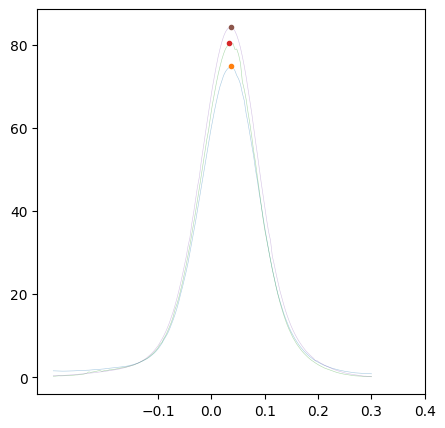

In [21]:
plt.rcParams["figure.figsize"] = (5,5)
files_df['V'] = pd.to_numeric(files_df['V'], downcast='float',  errors='coerce')

x = files_df['V'] # First column data
df = files_df.loc[(files_df['V']<=0.3) & (files_df['V']>=-0.1)].reset_index(drop=True) #select X range
col1 = df['V'] # First column data

peak_current = []
v_peak_current = []
eletrodo = []

a = 0

for column in df.columns[1:]:
        y = files_df[column]
        col2 = df[column] # Second column data

        #Find peaks
        peak_idx, _ = find_peaks(col2, prominence=0.000000001, height = 0.00 , distance = 100)  # Find peaks

        #Potential applied and array informations
        v_peak_current.append(df.at[peak_idx.max(),'V'])
        peak_current.append(col2[peak_idx.max()])
        condicao = re.findall('(\d+[A-Za-z]+|[A-Za-z]+\d+|\d+|[A-Za-z]+)', column)
        print(condicao)
        if condicao[1] == '50':
            c = 'D8'
        elif condicao[1] == '100':
            c = 'D9'
        eletrodo.append(condicao[0] + '-' + c)

        #Plot data
        plt.plot(x,y, lw=0.4, alpha=0.4 )

        #Plot peaks and valleys
        plt.plot(col1[peak_idx],col2[peak_idx], marker="o", ls="", ms=3)

        #Read data
        a+=1

plt.xticks([-0.1,0.0,0.1,0.2,0.3,0.4])
print(a)
print(eletrodo)

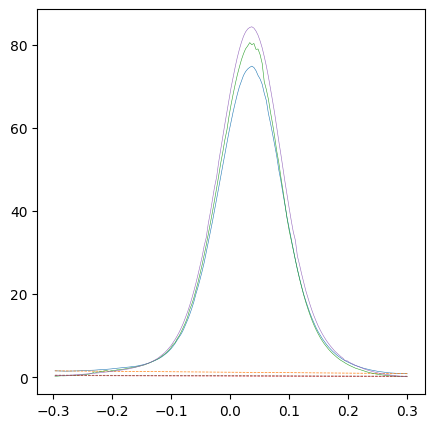

In [22]:
plt.rcParams["figure.figsize"] = (5,5)

baseline_data = {}

bl_1 = []

# need to define some fitting regions for the spline
roi = np.array([[-0.3,-0.25],[0.28,0.3]])

x = files_df['V'].to_numpy(dtype=float)
x = x[~np.isnan(x)]

baseline_data['V'] = x

for column in files_df.columns[1:]:
    y = files_df[column].to_numpy(dtype=float)
    y = y[~np.isnan(y)]
    # calculating the baselines
    ycalc_poly, base_poly = rampy.baseline(x, y, roi, 'poly', polynomial_order=1)
    bl_1.extend(base_poly[peak_idx[0]])
    #data - baseline
    subtracted = list()
    for item1, item2 in zip(y, base_poly):
        item = item1 - item2
        subtracted.extend(item)
    baseline_data[column] = subtracted
    #plot
    plt.plot(x, y, lw = 0.4)
    plt.plot(x, base_poly,linestyle= 'dashed', lw = 0.5)

In [23]:
results = pd.DataFrame()

results['eletrodo'] = eletrodo
results['peak_current'] = peak_current
results['v_peak_current'] = v_peak_current
results['baseline_current'] = bl_1

results_baseline = pd.DataFrame()

results_baseline['eletrodo'] = eletrodo
results_baseline['peak_current'] = results.apply(lambda row : row['peak_current'] - row['baseline_current'], axis=1)
results_baseline['v_peak_current'] = v_peak_current

results_baseline.head()
print(list(results_baseline['eletrodo']))
print(eletrodo)

['10-D8', '10-D8', '10-D8']
['10-D8', '10-D8', '10-D8']


In [24]:
#results_baseline.to_excel('08 29 24 limpos L7 lote 1.xlsx')

In [25]:
# results_mean_1 será para os dados de antes de a gente ir embora para consulta
# e results_mean_2 para os que a Juliana fez sozinha depois

results_mean_3 = results_baseline.groupby(['eletrodo'], as_index=False)[['peak_current','v_peak_current']].agg({'peak_current':['mean','std'],'v_peak_current':['mean','std']})

results_mean_3

eletrodo peak_current              v_peak_current             
                   mean          std           mean          std
0    10-D8 7.922318e+01 5.283002e+00   3.574212e-02 2.029527e-03

df = pd.DataFrame(data=baseline_data)
df.to_excel('dados_LMF_19_09_juliana.xlsx')
df.head()

In [26]:
results_mean = pd.concat([results_mean_1, results_mean_2, results_mean_3], ignore_index=True)
#list(results_mean['eletrodo'])

# L Cisteína:

In [27]:
print(list(results_mean['eletrodo']))
print()
#results_mean.loc[results_mean['eletrodo'] == '2-D8', ('peak_current', 'std')].values[0]

['1-CBM', '1-D6', '1-D7', '1-PBS', '1-branco', '1-cisteina', '1-limpo', '10-CBM', '10-D6', '10-D7', '10-GO', '10-PBS', '10-branco', '10-limpo', '11-CBM', '11-D6', '11-D7', '11-GO', '11-PBS', '11-branco', '11-limpo', '12-CBM', '12-D6', '12-D7', '12-GO', '12-PBS', '12-branco', '13-D7', '13-limpo', '13-pep', '14-D8', '14-limpo', '14-pep', '15-C7', '15-limpo', '15-pep', '16-C8', '16-limpo', '16-pep', '17-limpo', '18-limpo', '19-limpo', '2-CBM', '2-D6', '2-D7', '2-PBS', '2-branco', '2-cisteina', '2-limpo', '20-limpo', '21-limpo', '22-limpo', '23-limpo', '24-limpo', '3-CBM', '3-D6', '3-D7', '3-PBS', '3-branco', '3-cisteina', '3-limpo', '4-CBM', '4-D6', '4-D7', '4-PBS', '4-branco', '4-cisteina', '4-limpo', '5-CBM', '5-D6', '5-D7', '5-D8', '5-PBS', '5-branco', '5-cisteamina', '5-limpo', '6-CBM', '6-D6', '6-D7', '6-D8', '6-PBS', '6-branco', '6-cisteamina', '6-limpo', '7-CBM', '7-D6', '7-D7', '7-D8', '7-PBS', '7-branco', '7-cisteamina', '7-limpo', '8-CBM', '8-D6', '8-D7', '8-D8', '8-PBS', '8-bra

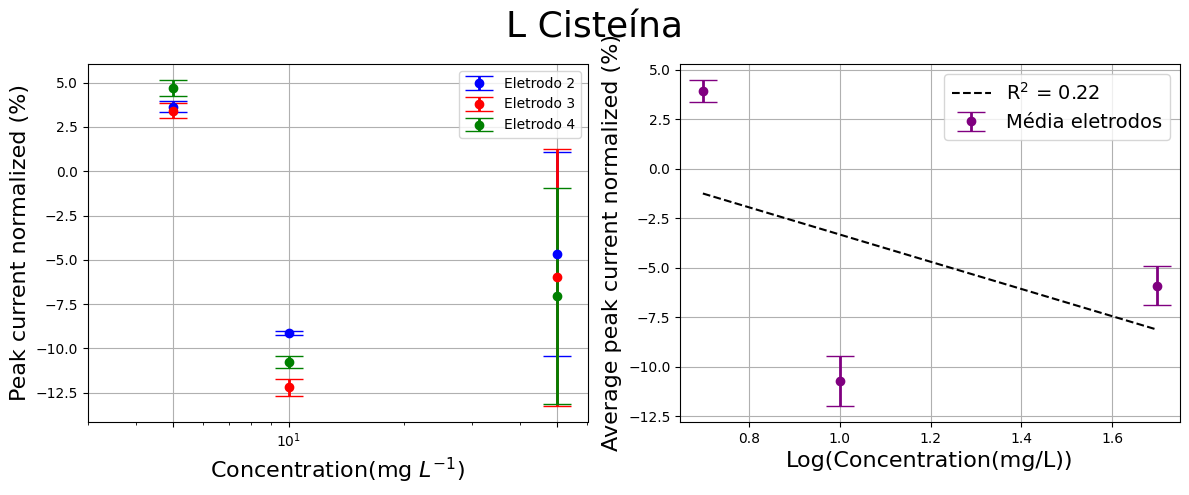

In [28]:
fig, [ax,ax1] = plt.subplots(1, 2, figsize=(12, 5))
 

# Plot for individual electrodes (ax)
ax.set_xscale('log')
ax.grid()
ax.set_xlabel(r"Concentration(mg $L^{-1}$)", fontsize=16)
ax.set_ylabel("Peak current normalized (%)", fontsize=16)

# Eletrodo 2:
BRANCO = results_mean.loc[results_mean['eletrodo'] == '2-branco', ('peak_current', 'mean')].values[0]
CONCENTRATIONS = [5, 10, 50]
LCONCENTRATIONS = np.log10(np.array(CONCENTRATIONS))
LABELS = [f"D{i}" for i in range(6, 9)]

Is_2 = []
Istds_2 = []
for i in range(len(LABELS)):
    eletrodo = '2-'+LABELS[i]
    I = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
    Inorm = 100*(I - BRANCO)/BRANCO
    Istd = 100*results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]
    Is_2.append(Inorm)
    Istds_2.append(Istd/BRANCO)

ax.errorbar(CONCENTRATIONS, Is_2, color='blue', yerr=Istds_2, fmt='o', elinewidth=2, ecolor='blue', capsize=10, label='Eletrodo 2')

# Eletrodo 3:
BRANCO = results_mean.loc[results_mean['eletrodo'] == '3-branco', ('peak_current', 'mean')].values[0]

Is_3 = []
Istds_3 = []
for i in range(len(LABELS)):
    eletrodo = '3-'+LABELS[i]
    I = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
    Inorm = 100*(I - BRANCO)/BRANCO
    Istd = 100*results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]
    Is_3.append(Inorm)
    Istds_3.append(Istd/BRANCO)

ax.errorbar(CONCENTRATIONS, Is_3, color='red', yerr=Istds_3, fmt='o', elinewidth=2, ecolor='red', capsize=10, label='Eletrodo 3')

# Eletrodo 4:
BRANCO = results_mean.loc[results_mean['eletrodo'] == '4-branco', ('peak_current', 'mean')].values[0]

Is_4 = []
Istds_4 = []
for i in range(len(LABELS)):
    eletrodo = '4-'+LABELS[i]
    I = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
    Inorm = 100*(I - BRANCO)/BRANCO
    Istd = 100*results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]
    Is_4.append(Inorm)
    Istds_4.append(Istd/BRANCO)

ax.errorbar(CONCENTRATIONS, Is_4, color='green', yerr=Istds_4, fmt='o', elinewidth=2, ecolor='green', capsize=10, label='Eletrodo 4')

ax.set_xlim(3, 60)
ax.set_xticks([5, 10, 50])
ax.legend()

# Now create ax1 for average and deviation plot with normal scale
ax1.grid()
ax1.set_xlabel("Log(Concentration(mg/L))", fontsize=16)
ax1.set_ylabel("Average peak current normalized (%)", fontsize=16)
fig.suptitle("L Cisteína", fontsize=26)

# Calculate mean and standard deviation for each concentration
Is_avg = np.mean([Is_2, Is_3, Is_4], axis=0)
Istds_avg = np.std([Is_2, Is_3, Is_4], axis=0)

# Plot the average and standard deviation
ax1.errorbar(LCONCENTRATIONS, Is_avg, color='purple', yerr=Istds_avg, fmt='o', elinewidth=2, ecolor='purple', capsize=10, label='Média eletrodos')

# Perform linear regression on the average data
concentrations_linear = np.array(LCONCENTRATIONS)
slope, intercept = np.polyfit(concentrations_linear, Is_avg, 1)
line_fit = slope * concentrations_linear + intercept

r_squared = r2_score(Is_avg, line_fit)
# Plot the linear regression line
ax1.plot(concentrations_linear, line_fit,linestyle = '--', color='0', label=fr'R$^2$ = {r_squared:.2f}')

# Calculate R² value
#ax1.text(20, max(Is_avg) * 0.8, f'R² = {r_squared:.2f}', fontsize=12)

#ax1.set_xlim(3, 60)
#ax1.set_xticks([5, 10, 50])
ax1.legend(fontsize = 14)

plt.tight_layout()
plt.savefig('L_cisteína.png', dpi = 200)

<>:157: SyntaxWarning: invalid escape sequence '\m'
<>:157: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_36730/2347698092.py:157: SyntaxWarning: invalid escape sequence '\m'
  ax_bar1.set_ylabel('$I_{max}$ ($\mu$A)', fontsize=16)


['2-D6', '2-D7', '2-D8']
['3-D6', '3-D7', '3-D8']
['4-D6', '4-D7', '4-D8']
[5, 10, 50]
[ 3.91846555 10.7018207   5.8996027 ]
['2-limpo', '2-cisteina', '2-CBM', '2-branco']
['3-limpo', '3-cisteina', '3-CBM', '3-branco']
['4-limpo', '4-cisteina', '4-CBM', '4-branco']
R² of the linear regression: 0.0039
Sensitivity: 0.4221


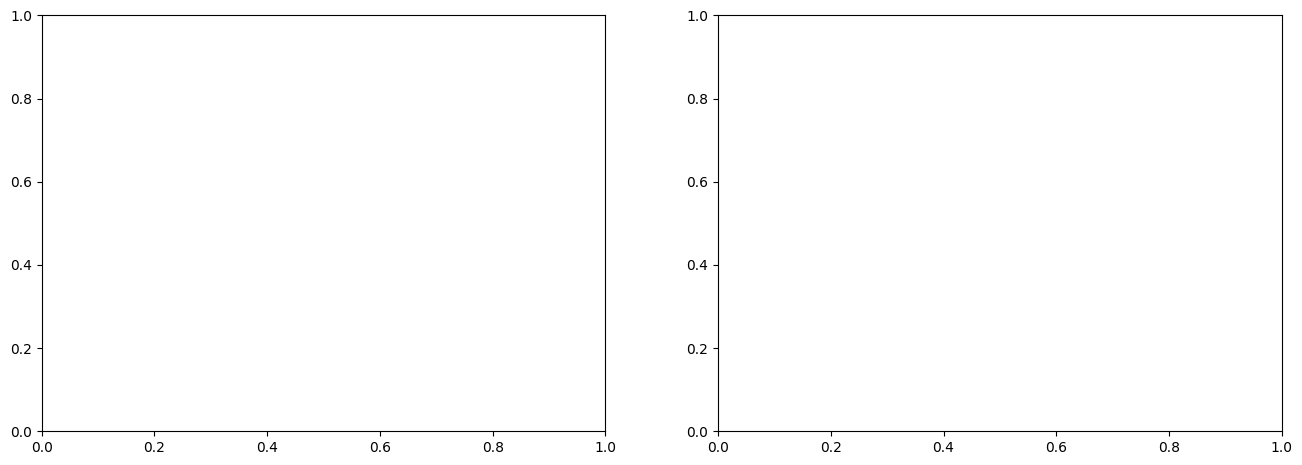

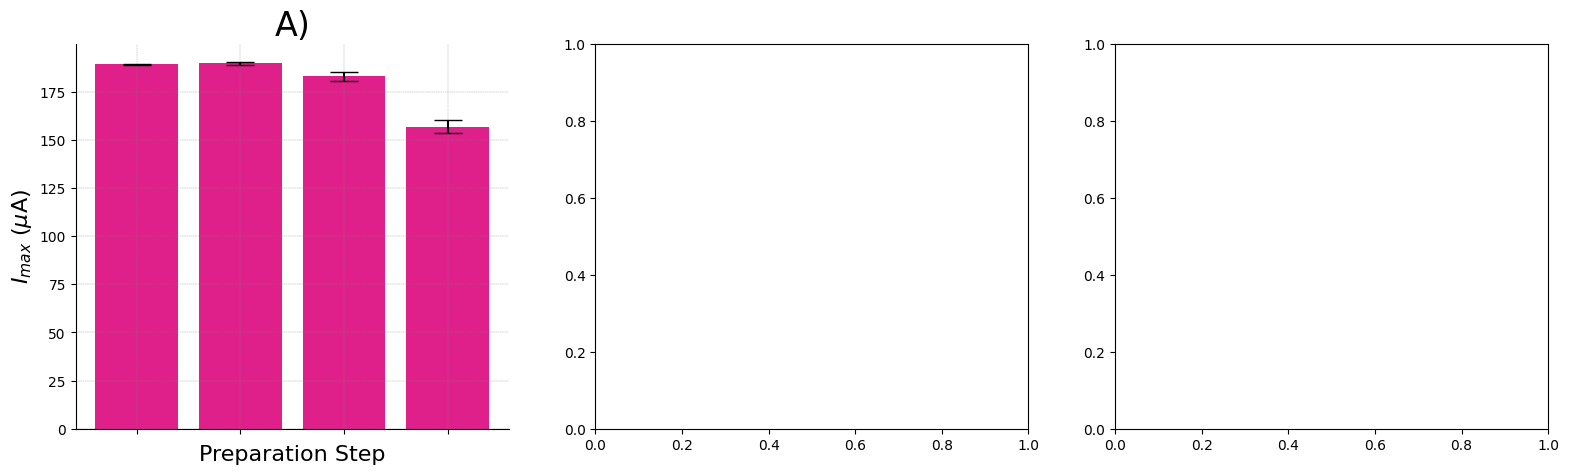

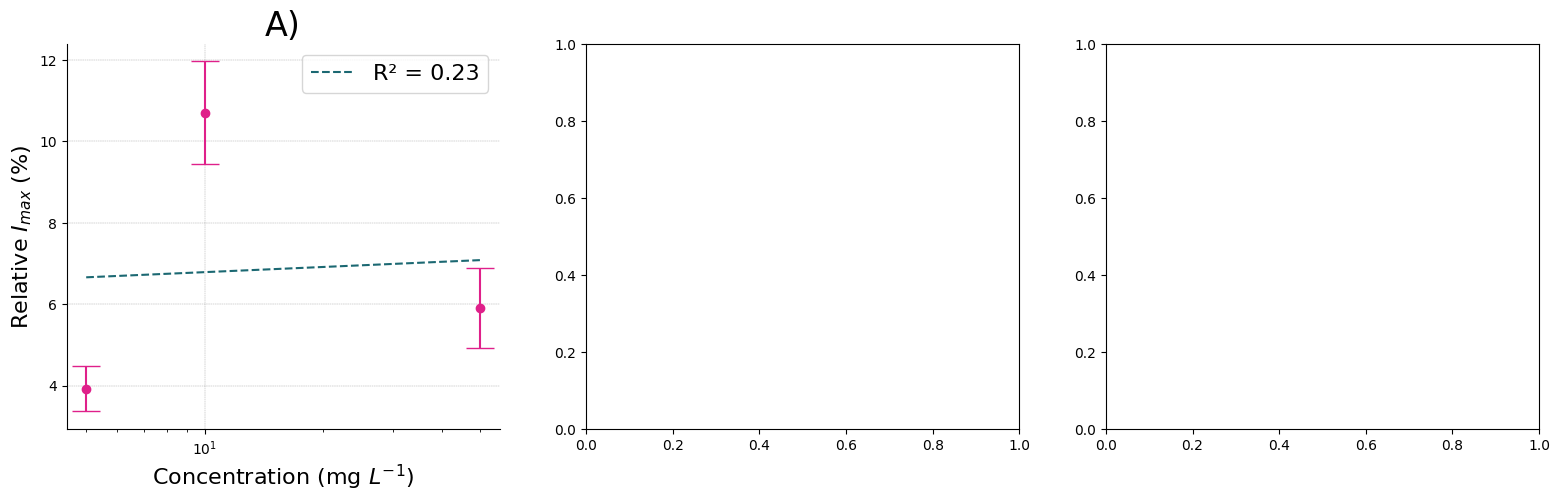

In [29]:
ELEC = []
LIMPOS = []

CONCENTRATIONS = [5, 10, 50]


# Create electrodes and limpos lists for electrodes 17 to 20
for u in range(2, 5):
    electrodes = [f'{u}-D{i}' for i in range(6, 9)]
    print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-branco']
    LIMPOS.append(limpos)

# Data storage for the bar plot
fig, [ax,ax1] = plt.subplots(1, 2, figsize=(16, 5.4), sharey = False)

fig_bar, [ax_bar1, ax_bar2, ax_bar3] = plt.subplots(1, 3, figsize=(19, 5), sharey = False)
fig_curve, [ax_curve1, ax_curve2, ax_curve3] = plt.subplots(1, 3, figsize=(19, 5), sharey = False)
#fig.subplots_adjust(wspace=0.35)
#ax.set_xscale('log')

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = np.absolute(100 * (I_mean - BRANCO) / BRANCO)
        normalized_std = 100 * I_std / BRANCO

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    #ax.errorbar(CONCENTRATIONS, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Sensor {c+6}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

print(CONCENTRATIONS)
print(avg_normalized_means)
# Plot the average on ax1 (dots with error bars, no connecting lines)
ax_curve1.errorbar(CONCENTRATIONS, avg_normalized_means, yerr=avg_normalized_stds, fmt='o', color=PALETTE[1], capsize=10)
ax_curve1.set_xscale('log')
ax_curve1.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
ax_curve1.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax_curve1.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)

# Perform linear regression on the log-transformed concentrations and averaged normalized means
log_concentrations = np.log10(CONCENTRATIONS)  # Use the log of the concentrations
slope, intercept, r_value, p_value, std_err = linregress(log_concentrations, avg_normalized_means)

# Generate values for the regression line
regression_line = intercept + slope * log_concentrations

# Plot the regression line on ax1
ax_curve1.plot(CONCENTRATIONS, regression_line, color=PALETTE[0], label=f'R² = 0.23', linestyle = '--')

# Set x-ticks and x-labels for the first plot
#ax.set_xticks(np.arange(1, len(electrodes) + 1))
#ax.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
#ax.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax.set_title('SVW drop casting', fontsize=18)
#ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 14)
ax_curve1.legend(fontsize = 16)
ax_curve1.spines[['right', 'top']].set_visible(False)
ax_curve1.spines[['right', 'top']].set_visible(False)








ELEC = []
LIMPOS = []
etapas = ['limpo', 'cisteina', 'CBM', 'branco']
steps = [1,2,3,4]
# Create electrodes and limpos lists for electrodes 17 to 20
for u in range(2, 5):
    electrodes = [f'{u}-{i}' for i in etapas]
    print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-branco']
    LIMPOS.append(limpos)

# Data storage for the bar plot

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
#        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = I_mean
        normalized_std = I_std

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    #ax.errorbar(steps, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Sensor {c+6}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

labels = ['Clean', 'SAM', 'SAM + BACBM2' , 'SAM + BACBM2 + SuperBlock']
labels = ['', '', '' , '']

# Plot the average on ax1 (dots with error bars, no connecting lines)
bars = ax_bar1.bar(steps, avg_normalized_means, yerr=avg_normalized_stds, color=PALETTE[1], capsize=10)
ax_bar1.set_xlabel('Preparation Step', fontsize=16)
ax_bar1.set_ylabel('$I_{max}$ ($\mu$A)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax_bar1.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)

#ax.set_title('SVW drop casting', fontsize=18)
#ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 14)
#ax.legend(fontsize = 16)
#ax.spines[['right', 'top']].set_visible(False)
ax_bar1.spines[['right', 'top']].set_visible(False)
ax_bar1.set_xticks([1,2,3,4])
# Rotate x-tick labels by 45 degrees
ax_bar1.set_xticklabels([], fontsize=12, rotation=45)

for bar, label in zip(bars, labels):
    ax_bar1.text(bar.get_x() + bar.get_width() / 2, 5, label, ha='center', va='bottom', fontsize=13, rotation=90)


# Adjust layout and save the plot
#plt.tight_layout()
#plt.savefig('figures/CISTEAMINA_CBM_SAM.png', dpi=200, transparent = True)
#
ax_bar1.set_title('A)', fontsize = 24)
ax_curve1.set_title('A)', fontsize = 24)



# Adjust layout and save the plot
#fig.suptitle('A)', fontsize = 25)
#plt.tight_layout()
#fig.subplots_adjust(wspace=0.35)

#plt.savefig('figures/CYSTEINE_TEST.png', dpi=200, transparent = True)





# Print R-squared value
print(f"R² of the linear regression: {r_value**2:.4f}"); print(f"Sensitivity: {slope:.4f}"); 

# Cisteamina:

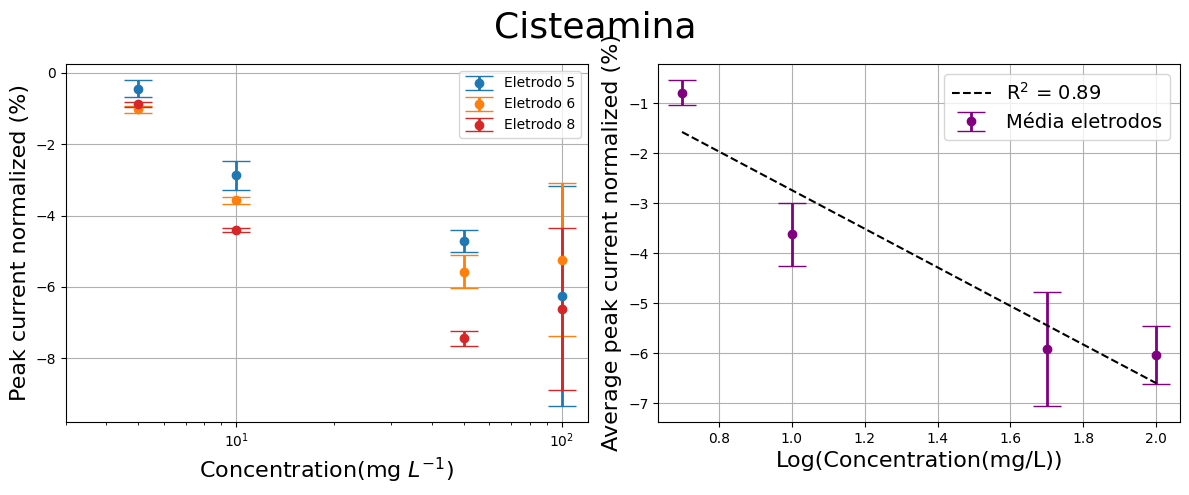

In [30]:
fig, [ax,ax1] = plt.subplots(1, 2, figsize=(12, 5))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# First figure for individual electrodes
#fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.set_xscale('log')
ax.grid()
ax.set_xlabel(r"Concentration(mg $L^{-1}$)", fontsize=16)
ax.set_ylabel("Peak current normalized (%)", fontsize=16)
ax.set_xlim(3, 120)

# Data storage for average calculation
all_Is = []
all_Istds = []

for E in range(4):  # Loop over electrodes (5 to 8)
    if E == 2:  # Skip eletrodo 7 (E+5 = 7)
        continue
    BRANCO = results_mean.loc[results_mean['eletrodo'] == f'{E+5}-branco', ('peak_current', 'mean')].values[0]
    CONCENTRATIONS = [5, 10, 50, 100]
    LCONCENTRATIONS = np.log10(np.array(CONCENTRATIONS))
    LABELS = [f"D{i}" for i in range(6, 10)]

    Is = []
    Istds = []
    for i in range(len(LABELS)):
        eletrodo = f'{E+5}-'+LABELS[i]
        I = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        Inorm = 100*(I - BRANCO) / BRANCO
        Istd = 100*results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]
        Is.append(Inorm)
        Istds.append(Istd / BRANCO)

    # Store data for calculating averages
    all_Is.append(Is)
    all_Istds.append(Istds)

    ax.errorbar(CONCENTRATIONS, Is, color=colors[E], yerr=Istds, fmt='o', elinewidth=2, ecolor=colors[E], capsize=10, label=f'Eletrodo {E+5}')
    ax.legend()

# Second figure for average and deviation between electrodes
ax1.grid()
ax1.set_xlabel("Log(Concentration(mg/L))", fontsize=16)
ax1.set_ylabel("Average peak current normalized (%)", fontsize=16)
#ax1.set_xlim(3, 120)

# Calculate the average and standard deviation across electrodes for each concentration
Is_avg = np.mean(all_Is, axis=0)
Istds_avg = np.std(all_Is, axis=0)

# Plot the average and deviation
ax1.errorbar(LCONCENTRATIONS, Is_avg, color='purple', yerr=Istds_avg, fmt='o', elinewidth=2, ecolor='purple', capsize=10, label='Média eletrodos')

# Perform linear regression on the average data
concentrations_linear = np.array(LCONCENTRATIONS)
slope, intercept = np.polyfit(concentrations_linear, Is_avg, 1)
line_fit = slope * concentrations_linear + intercept
r_squared = r2_score(Is_avg, line_fit)

# Plot the linear regression line
ax1.plot(concentrations_linear, line_fit, color='0', linestyle = '--', label=fr'R$^2$ = {r_squared:.2f}')

# Calculate R² value
#ax1.text(20, max(Is_avg) * 0.8, f'R² = {r_squared:.2f}', fontsize=12)

#ax1.set_xticks([5, 10, 50, 100])
ax1.legend(fontsize = 14)


fig.suptitle('Cisteamina', fontsize = 26)
plt.tight_layout()

plt.savefig('cisteamina.png', dpi = 200)

In [31]:
ELEC = []
LIMPOS = []

CONCENTRATIONS = [5, 10, 50, 100]


# Create electrodes and limpos lists for electrodes 17 to 20
for u in [5,6,8]:
    electrodes = [f'{u}-D{i}' for i in range(6, 10)]
    print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-branco']
    LIMPOS.append(limpos)

# Data storage for the bar plot
#fig, [ax,ax1] = plt.subplots(1, 2, figsize=(16, 5.4), sharey = False)
fig.subplots_adjust(wspace=0.35)
#ax.set_xscale('log')

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = np.absolute(100 * (I_mean - BRANCO) / BRANCO)
        normalized_std = 100 * I_std / BRANCO

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    #ax.errorbar(CONCENTRATIONS, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Sensor {c+6}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

print(CONCENTRATIONS)
print(avg_normalized_means)
# Plot the average on ax1 (dots with error bars, no connecting lines)
ax_curve2.errorbar(CONCENTRATIONS, avg_normalized_means, yerr=avg_normalized_stds, fmt='o', color=PALETTE[1], capsize=10)

print('avg_normalized_means:')
print(avg_normalized_means)
print()
print('avg_normalized_stds:')
print(avg_normalized_stds)

ax_curve2.set_xscale('log')
ax_curve2.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
ax_curve2.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax_curve2.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)

# Perform linear regression on the log-transformed concentrations and averaged normalized means
log_concentrations = np.log10(CONCENTRATIONS)  # Use the log of the concentrations
slope, intercept, r_value, p_value, std_err = linregress(log_concentrations, avg_normalized_means)

# Generate values for the regression line
regression_line = intercept + slope * log_concentrations

# Plot the regression line on ax1
ax_curve2.plot(CONCENTRATIONS, regression_line, color= PALETTE[0], label=f'R² = {r_value**2:.2f}', linestyle = '--')

# Set x-ticks and x-labels for the first plot
#ax.set_xticks(np.arange(1, len(electrodes) + 1))
#ax.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
#ax.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax.set_title('SVW drop casting', fontsize=18)
#ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 14)
ax_curve2.legend(fontsize = 16)
ax_bar2.spines[['right', 'top']].set_visible(False)
ax_curve2.spines[['right', 'top']].set_visible(False)








ELEC = []
LIMPOS = []
etapas = ['limpo', 'cisteamina', 'CBM', 'branco']
steps = [1,2,3,4]
# Create electrodes and limpos lists for electrodes 17 to 20
for u in [5,6, 8]:
    electrodes = [f'{u}-{i}' for i in etapas]
    print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-branco']
    LIMPOS.append(limpos)

# Data storage for the bar plot

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
#        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = I_mean
        normalized_std = I_std

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    #ax.errorbar(steps, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Sensor {c+6}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

labels = ['Clean', 'SAM', 'SAM + BACBM2' , 'SAM + BACBM2 + SuperBlock']
# Plot the average on ax1 (dots with error bars, no connecting lines)
bars = ax_bar2.bar(steps, avg_normalized_means, yerr=avg_normalized_stds, color=PALETTE[1], capsize=10)
ax_bar2.set_xlabel('Preparation Step', fontsize=16)
ax_bar2.set_ylabel('$I_{max}$ ($\mu$A)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax_bar2.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)

#ax.set_title('SVW drop casting', fontsize=18)
#ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 14)
#ax.legend(fontsize = 16)
#ax.spines[['right', 'top']].set_visible(False)
ax_bar2.spines[['right', 'top']].set_visible(False)
ax_bar2.set_xticks([1,2,3,4])
# Rotate x-tick labels by 45 degrees
ax_bar2.set_xticklabels([], fontsize=12, rotation=45)

#for bar, label in zip(bars, labels):
#    ax_bar1.text(bar.get_x() + bar.get_width() / 2, 5, label, ha='center', va='bottom', fontsize=13, rotation=90)


# Adjust layout and save the plot
#plt.tight_layout()
#plt.savefig('figures/CISTEAMINA_CBM_SAM.png', dpi=200, transparent = True)
#





# Adjust layout and save the plot
#fig.suptitle('B)', fontsize = 25)
#plt.tight_layout()
#fig.subplots_adjust(wspace=0.35)

#plt.savefig('figures/CYSTEAMINE_TEST.png', dpi=200, transparent = True)
ax_bar2.set_title('B)', fontsize = 24)
ax_curve2.set_title('B)', fontsize = 24)


# Print R-squared value
print(f"R² of the linear regression: {r_value**2:.4f}"); print(f"Sensitivity: {slope:.4f}"); 
#fig_curve

['5-D6', '5-D7', '5-D8', '5-D9']
['6-D6', '6-D7', '6-D8', '6-D9']
['8-D6', '8-D7', '8-D8', '8-D9']
[5, 10, 50, 100]
[0.78155669 3.61931547 5.9083739  6.03342077]
avg_normalized_means:
[0.78155669 3.61931547 5.9083739  6.03342077]

avg_normalized_stds:
[0.24539241 0.62998582 1.14131676 0.58372152]
['5-limpo', '5-cisteamina', '5-CBM', '5-branco']
['6-limpo', '6-cisteamina', '6-CBM', '6-branco']
['8-limpo', '8-cisteamina', '8-CBM', '8-branco']
R² of the linear regression: 0.8932
Sensitivity: 3.8661


<>:159: SyntaxWarning: invalid escape sequence '\m'
<>:159: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_36730/1456101919.py:159: SyntaxWarning: invalid escape sequence '\m'
  ax_bar2.set_ylabel('$I_{max}$ ($\mu$A)', fontsize=16)


# Grafeno:

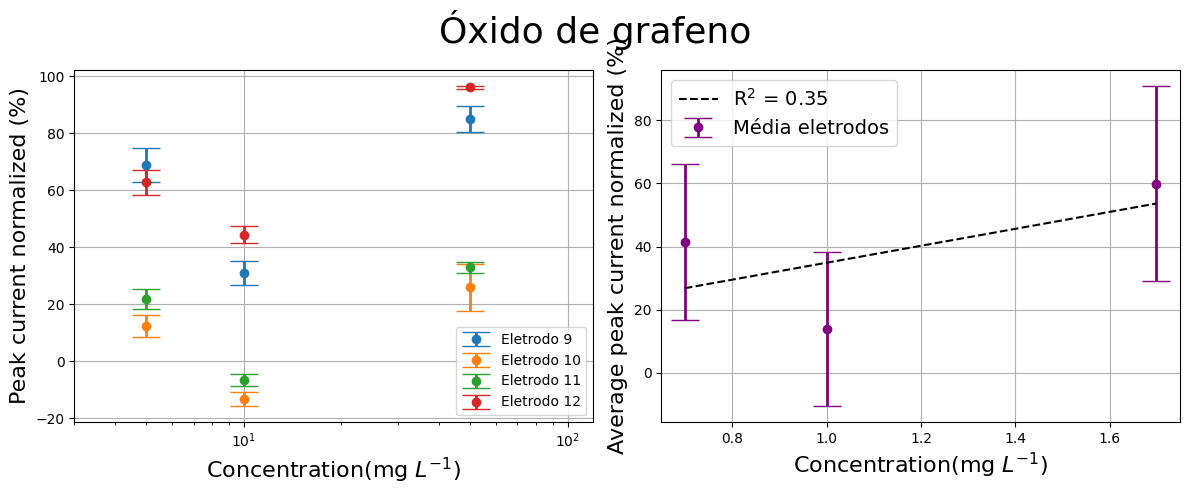

In [32]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# First figure for individual electrodes
fig, [ax,ax1] = plt.subplots(1, 2, figsize=(12, 5))
ax.set_xscale('log')
ax.grid()
ax.set_xlabel(r"Concentration(mg $L^{-1}$)", fontsize=16)
ax.set_ylabel("Peak current normalized (%)", fontsize=16)
ax.set_xlim(3, 120)

# Data storage for average calculation
all_Is = []
all_Istds = []

for E in range(4):  # Loop over electrodes (9 to 12)

    BRANCO = results_mean.loc[results_mean['eletrodo'] == f'{E+9}-branco', ('peak_current', 'mean')].values[0]
    CONCENTRATIONS = [5, 10, 50]
    LCONCENTRATIONS = np.log10(np.array(CONCENTRATIONS))
    LABELS = [f"D{i}" for i in range(6, 9)]

    Is = []
    Istds = []
    for i in range(len(LABELS)):
        eletrodo = f'{E+9}-' + LABELS[i]
        I = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        Inorm = 100*(I - BRANCO) / BRANCO
        Istd = 100*results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]
        Is.append(Inorm)
        Istds.append(Istd / BRANCO)

    # Store data for calculating averages
    all_Is.append(Is)
    all_Istds.append(Istds)

    ax.errorbar(CONCENTRATIONS, Is, color=colors[E], yerr=Istds, fmt='o', elinewidth=2, ecolor=colors[E], capsize=10, label=f'Eletrodo {E+9}')
    ax.legend()

# Second figure for average and deviation between electrodes
ax1.grid()
ax1.set_xlabel(r"Concentration(mg $L^{-1}$)", fontsize=16)
ax1.set_ylabel("Average peak current normalized (%)", fontsize=16)
fig.suptitle("Óxido de grafeno", fontsize=26)
#ax1.set_xlim(3, 120)

# Calculate the average and standard deviation across electrodes for each concentration
Is_avg = np.mean(all_Is, axis=0)
Istds_avg = np.std(all_Is, axis=0)

# Plot the average and deviation
ax1.errorbar(LCONCENTRATIONS, Is_avg, color='purple', yerr=Istds_avg, fmt='o', elinewidth=2, ecolor='purple', capsize=10, label='Média eletrodos')

# Perform linear regression on the average data
concentrations_linear = np.array(LCONCENTRATIONS)
slope, intercept = np.polyfit(concentrations_linear, Is_avg, 1)
line_fit = slope * concentrations_linear + intercept

# Plot the linear regression line
r_squared = r2_score(Is_avg, line_fit)

ax1.plot(concentrations_linear, line_fit, color='0',linestyle = '--', label=fr'R$^2$ = {r_squared:.2f}')

# Calculate R² value
#ax1.text(20, max(Is_avg) * 0.8, f'R² = {r_squared:.2f}', fontsize=12)

#ax1.set_xticks([5, 10, 50])
ax1.legend(fontsize = 14)

plt.tight_layout()
plt.savefig('oxido_de_grafeno.png', dpi = 200)

In [33]:
print(list(results_mean['eletrodo']))


['1-CBM', '1-D6', '1-D7', '1-PBS', '1-branco', '1-cisteina', '1-limpo', '10-CBM', '10-D6', '10-D7', '10-GO', '10-PBS', '10-branco', '10-limpo', '11-CBM', '11-D6', '11-D7', '11-GO', '11-PBS', '11-branco', '11-limpo', '12-CBM', '12-D6', '12-D7', '12-GO', '12-PBS', '12-branco', '13-D7', '13-limpo', '13-pep', '14-D8', '14-limpo', '14-pep', '15-C7', '15-limpo', '15-pep', '16-C8', '16-limpo', '16-pep', '17-limpo', '18-limpo', '19-limpo', '2-CBM', '2-D6', '2-D7', '2-PBS', '2-branco', '2-cisteina', '2-limpo', '20-limpo', '21-limpo', '22-limpo', '23-limpo', '24-limpo', '3-CBM', '3-D6', '3-D7', '3-PBS', '3-branco', '3-cisteina', '3-limpo', '4-CBM', '4-D6', '4-D7', '4-PBS', '4-branco', '4-cisteina', '4-limpo', '5-CBM', '5-D6', '5-D7', '5-D8', '5-PBS', '5-branco', '5-cisteamina', '5-limpo', '6-CBM', '6-D6', '6-D7', '6-D8', '6-PBS', '6-branco', '6-cisteamina', '6-limpo', '7-CBM', '7-D6', '7-D7', '7-D8', '7-PBS', '7-branco', '7-cisteamina', '7-limpo', '8-CBM', '8-D6', '8-D7', '8-D8', '8-PBS', '8-bra

['9-D6', '9-D7', '9-D8']
['10-D6', '10-D7', '10-D8']
['11-D6', '11-D7', '11-D8']
['12-D6', '12-D7', '12-D8']
[5, 10, 50]
[41.49849297 23.79015612 59.97730765]
['9-limpo', '9-GO', '9-CBM', '9-branco']
['10-limpo', '10-GO', '10-CBM', '10-branco']
['11-limpo', '11-GO', '11-CBM', '11-branco']


<>:152: SyntaxWarning: invalid escape sequence '\m'
<>:190: SyntaxWarning: invalid escape sequence '\m'
<>:152: SyntaxWarning: invalid escape sequence '\m'
<>:190: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_36730/3166172736.py:152: SyntaxWarning: invalid escape sequence '\m'
  ax_bar3.set_ylabel('$I_{max}$ ($\mu$A)', fontsize=16)
/tmp/ipykernel_36730/3166172736.py:190: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$I_{max}$ ($\mu$A)', fontsize=20)


R² of the linear regression: 0.4763
Sensitivity: 24.3429


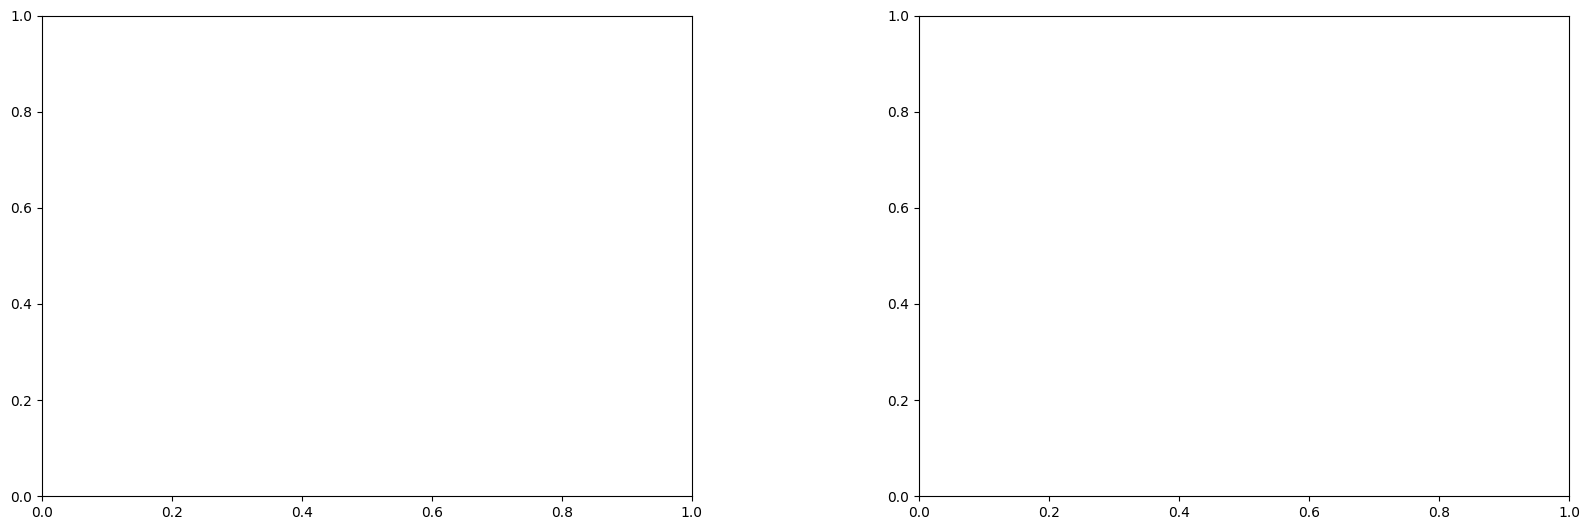

In [34]:
ELEC = []
LIMPOS = []

CONCENTRATIONS = [5, 10, 50]


# Create electrodes and limpos lists for electrodes 17 to 20
for u in [9,10,11,12]:
    electrodes = [f'{u}-D{i}' for i in range(6, 9)]
    print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-branco']
    LIMPOS.append(limpos)

# Data storage for the bar plot
fig, [ax,ax1] = plt.subplots(1, 2, figsize=(16, 5.4), sharey = False)
fig.subplots_adjust(wspace=0.35)
#ax.set_xscale('log')

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = np.absolute(100 * (I_mean - BRANCO) / BRANCO)
        normalized_std = 100 * I_std / BRANCO

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    #ax.errorbar(CONCENTRATIONS, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Sensor {c+6}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

print(CONCENTRATIONS)
print(avg_normalized_means)
# Plot the average on ax1 (dots with error bars, no connecting lines)
ax_curve3.errorbar(CONCENTRATIONS, avg_normalized_means, yerr=avg_normalized_stds, fmt='o', color=PALETTE[1], capsize=10)
ax_curve3.set_xscale('log')
ax_curve3.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
ax_curve3.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax_curve3.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)

# Perform linear regression on the log-transformed concentrations and averaged normalized means
log_concentrations = np.log10(CONCENTRATIONS)  # Use the log of the concentrations
slope, intercept, r_value, p_value, std_err = linregress(log_concentrations, avg_normalized_means)

# Generate values for the regression line
regression_line = intercept + slope * log_concentrations

# Plot the regression line on ax1
ax_curve3.plot(CONCENTRATIONS, regression_line, color=PALETTE[0], label=f'R² = {r_value**2:.2f}', linestyle = '--')

# Set x-ticks and x-labels for the first plot
#ax.set_xticks(np.arange(1, len(electrodes) + 1))
#ax.set_xlabel(r'Concentration (mg $L^{-1}$)', fontsize=16)
#ax.set_ylabel('Relative $I_{max}$ (%)', fontsize=16)
#ax.set_title('SVW drop casting', fontsize=18)
#ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 14)
ax_curve3.legend(fontsize = 16)
ax_bar3.spines[['right', 'top']].set_visible(False)
ax_curve3.spines[['right', 'top']].set_visible(False)








ELEC = []
LIMPOS = []
etapas = ['limpo', 'GO', 'CBM', 'branco']
steps = [1,2,3,4]
# Create electrodes and limpos lists for electrodes 17 to 20
for u in [9,10,11]:
    electrodes = [f'{u}-{i}' for i in etapas]
    print(electrodes)
    ELEC.append(electrodes)
    
    limpos = 5*[f'{u}-branco']
    LIMPOS.append(limpos)

# Data storage for the bar plot

c = 0
all_normalized_means = []  # List to store all normalized means for averaging later
all_normalized_stds = []   # List to store all normalized stds for averaging later

# Loop over each electrode set (17 to 20)
for elec in ELEC:
    normalized_means = []
    normalized_stds = []
    
    for i, eletrodo in enumerate(elec):
        # Get the BRANCO value
#        BRANCO = results_mean.loc[results_mean['eletrodo'] == LIMPOS[c][i], ('peak_current', 'mean')].values[0]

        # Get the mean and std of the $I_{max}$ for the current electrode
        I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
        I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

        # Normalize the $I_{max}$
        normalized_mean = I_mean
        normalized_std = I_std

        # Store the normalized data
        normalized_means.append(normalized_mean)
        normalized_stds.append(normalized_std)
    
    # Plot dots with error bars for individual electrodes on ax (no connecting lines)
    #ax.errorbar(steps, normalized_means, yerr=normalized_stds, fmt='o', color=colors[c], capsize=10, label=f'Sensor {c+6}')
    
    all_normalized_means.append(normalized_means)
    all_normalized_stds.append(normalized_stds)
    
    c += 1

# Calculate the average normalized means and stds across the four electrodes
avg_normalized_means = np.mean(all_normalized_means, axis=0)
avg_normalized_stds = np.std(all_normalized_means, axis=0)

labels = ['Clean', 'SAM', 'SAM + BACBM2' , 'SAM + BACBM2 + SB']
# Plot the average on ax1 (dots with error bars, no connecting lines)
bars = ax_bar3.bar(steps, avg_normalized_means, yerr=avg_normalized_stds, color=PALETTE[1], capsize=10)
ax_bar3.set_xlabel('Preparation Step', fontsize=16)
ax_bar3.set_ylabel('$I_{max}$ ($\mu$A)', fontsize=16)
#ax1.set_title('Average SVW for Electrodes 17 to 20', fontsize=18)
ax_bar3.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)

#ax.set_title('SVW drop casting', fontsize=18)
#ax.grid(True, linestyle='--', linewidth=0.3, color='gray', alpha=0.8)
#ax.legend(fontsize = 14)
#ax.legend(fontsize = 16)
#ax.spines[['right', 'top']].set_visible(False)
ax_bar3.spines[['right', 'top']].set_visible(False)
ax_bar3.set_xticks([1,2,3,4])
# Rotate x-tick labels by 45 degrees
ax_bar3.set_xticklabels([], fontsize=12, rotation=45)

#for bar, label in zip(bars, labels[:-1]):
#    ax_bar3.text(bar.get_x() + bar.get_width() / 2, 5, label, ha='center', va='bottom', fontsize=13, rotation=90)
#ax_bar3.text(bars[-1].get_x() + bars[-1].get_width() /2, 75, labels[-1], ha='center', va='bottom', fontsize=13, rotation=90)

# Adjust layout and save the plot
#fig.suptitle('C)', fontsize = 25)
plt.tight_layout()

fig.subplots_adjust(wspace=0.35)

#plt.savefig('figures/GO_TEST.png', dpi=200, transparent = True)
#

ax_bar3.set_title('C)', fontsize = 24)
ax_curve3.set_title('C)', fontsize = 24)


for ax in [ax_curve1, ax_curve2, ax_curve3]:
    ax.set_xlabel(r'Concentração de Microplásticos (mg $L^{-1}$)', fontsize=20)
    ax.set_ylabel('$I_{max}$ Relativa (%)', fontsize=20)
    ax.legend(fontsize = 16)
    
for ax in [ax_bar1, ax_bar2, ax_bar3]:
    ax.set_xlabel(r'Etapa de preparação', fontsize=20)
    ax.set_ylabel('$I_{max}$ ($\mu$A)', fontsize=20)
    #ax.legend(fontsize = 16)
    
fig_bar.tight_layout()
fig_curve.tight_layout()

fig_bar.savefig('figures/preparacao_test.png', dpi = 400, transparent = True)
fig_curve.savefig('figures/analitica_test.png', dpi = 400, transparent = True)
# Print R-squared value
print(f"R² of the linear regression: {r_value**2:.4f}"); print(f"Sensitivity: {slope:.4f}"); 

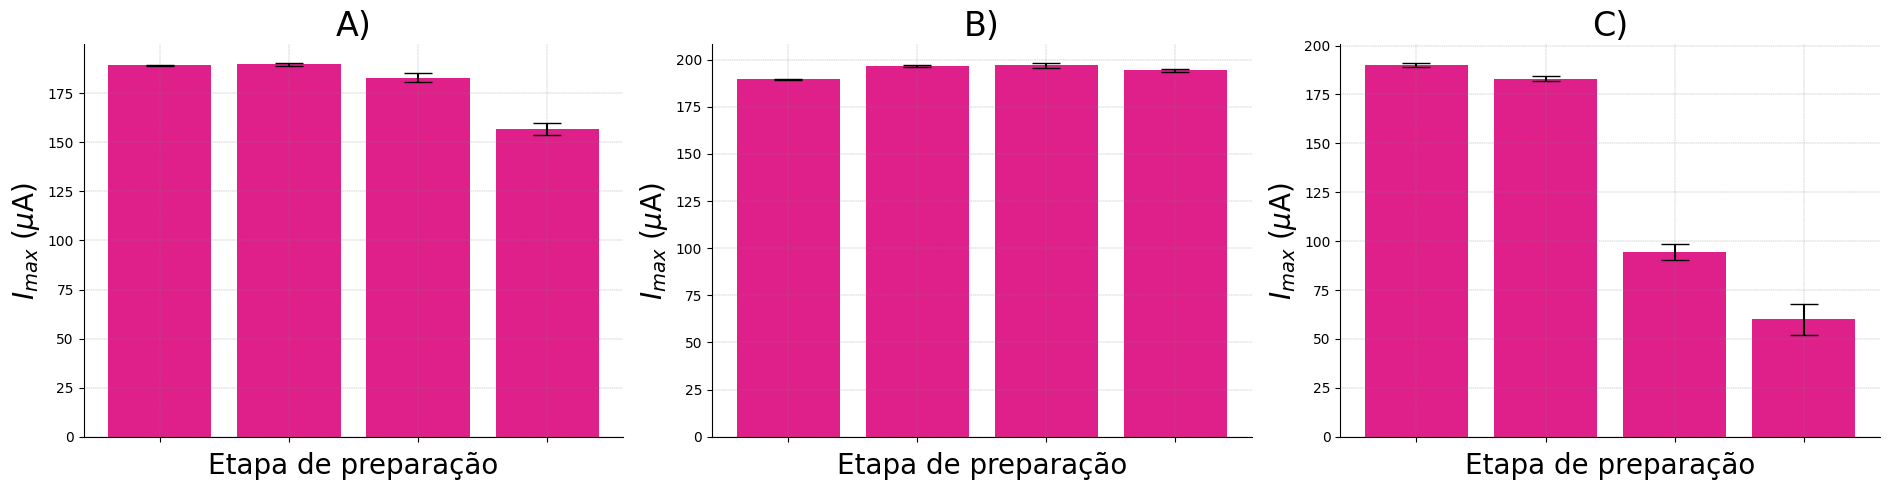

In [35]:
fig_bar

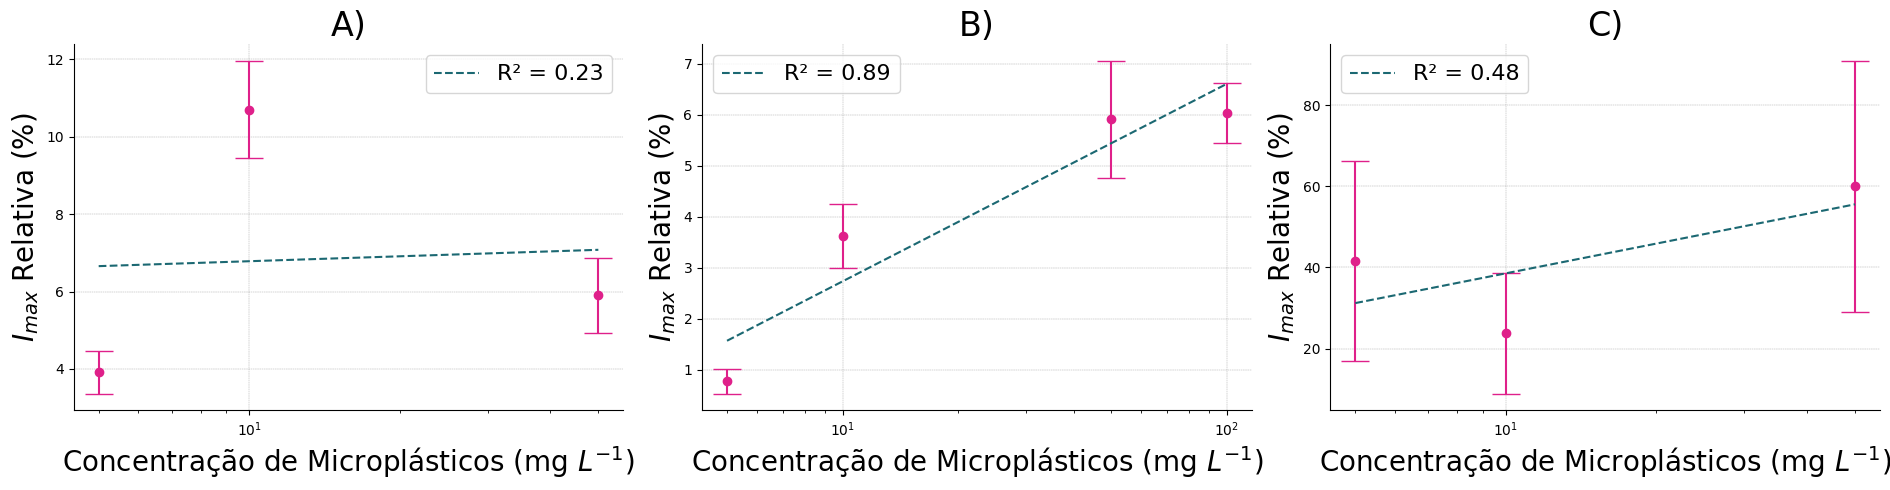

In [36]:

fig_curve

# Drop casting

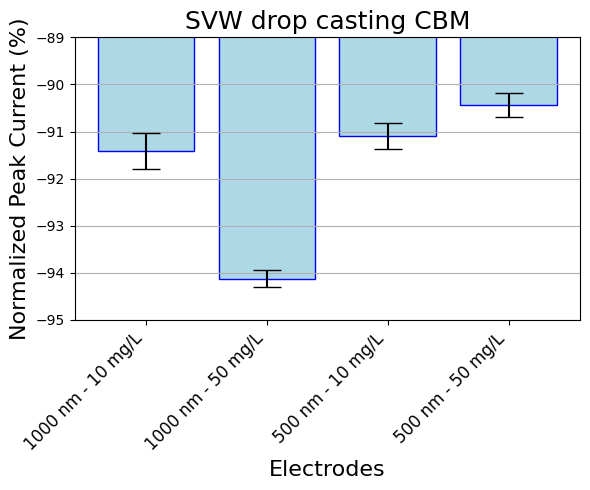

In [37]:
electrodes = ['13-D7', '14-D8', '15-C7', '16-C8']
limpos = ['13-limpo', '14-limpo', '15-limpo', '16-limpo'] 
labels = ['1000 nm - 10 mg/L', '1000 nm - 50 mg/L', '500 nm - 10 mg/L', '500 nm - 50 mg/L']

# Data storage for the bar plot
normalized_means = []
normalized_stds = []

for i, eletrodo in enumerate(electrodes):
    # Get the BRANCO value
    BRANCO = results_mean.loc[results_mean['eletrodo'] == limpos[i], ('peak_current', 'mean')].values[0]
    
    # Get the mean and std of the peak current for the current electrode
    I_mean = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'mean')].values[0]
    I_std = results_mean.loc[results_mean['eletrodo'] == eletrodo, ('peak_current', 'std')].values[0]

    # Normalize the peak current
    normalized_mean = 100 * (I_mean - BRANCO) / BRANCO
    normalized_std = 100 * I_std / BRANCO

    # Store the normalized data
    normalized_means.append(normalized_mean)
    normalized_stds.append(normalized_std)

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 5))

# Plot bars with error bars
ax.bar(np.arange(len(electrodes)) + 1, normalized_means, yerr=normalized_stds, color='lightblue', edgecolor='blue', capsize=10)

# Set x-ticks and x-labels
ax.set_xticks(np.arange(1, len(electrodes) + 1))
ax.set_xticklabels(labels, fontsize=12, rotation=45, ha='right')
ax. set_ylim(-95, -89)
# Set labels for the axes
ax.set_xlabel('Electrodes', fontsize=16)
ax.set_ylabel('Normalized Peak Current (%)', fontsize=16)
ax.set_title('SVW drop casting CBM', fontsize=18)

# Add a grid
ax.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.savefig('dropccast.png', dpi = 200)

In [38]:
results_mean.to_excel('media_medidas_LMF_19_09.xlsx')